# Preprocessing data and performing EDA
Tranforming the data into structured folder.
Currently the folder contains the training folder which has three folders called a,b,c,d,e,f.
Each folder has numerous number of files each folder has files (.wav) which are heartbeat sounds of varying lengths and (Records_Normal) and (Records_Abnormal) which contaisn label for each .wav file. From each folder only the .wav files have been picked up and depending on the labels 
Picking up all the files with (.wav) extension and moving into folders called "Abnormal" and "Normal" 

In [ ]:
import os
import shutil
training_folders = ["training-a", "training-b", "training-c", "training-d", "training-e", "training-f"]

root_base = "training" 

def load_clean_list(path):
    """Reads filenames and ensures they end with .wav."""
    names = set()
    with open(path, "r") as f:
        for line in f:
            name = line.strip().lower()
            if name and not name.endswith(".wav"):
                name += ".wav"
            names.add(name)
    return names

for folder in training_folders:
    folder_path = os.path.join(root_base, folder)
    print(f"\nProcessing folder: {folder_path}")

    normal_list_path = os.path.join(folder_path, "RECORDS-normal")
    abnormal_list_path = os.path.join(folder_path, "RECORDS-abnormal")

    normal_out = os.path.join(folder_path, "normal")
    abnormal_out = os.path.join(folder_path, "abnormal")
    os.makedirs(normal_out, exist_ok=True)
    os.makedirs(abnormal_out, exist_ok=True)

    normal_files = load_clean_list(normal_list_path)
    abnormal_files = load_clean_list(abnormal_list_path)

    for wav_file in os.listdir(folder_path):
        if not wav_file.lower().endswith(".wav"):
            continue

        wav_key = wav_file.lower()
        src = os.path.join(folder_path, wav_file)

        if wav_key in normal_files:
            shutil.move(src, os.path.join(normal_out, wav_file))
            print(f"Moved {wav_file} → normal/")
        elif wav_key in abnormal_files:
            shutil.move(src, os.path.join(abnormal_out, wav_file))
            print(f"Moved {wav_file} → abnormal/")
        else:
            print(f"{wav_file} NOT FOUND in normal or abnormal lists!")


Converting all images to spectrograms in order to reduce the processing speed.
\
Spectrograms: It is defined as the visual representation of frequencies against time . It is shown in many colours which indicates the signal sstrengths. If the colour is bright it then means the strength was high. In terms, the brightness of the signal is directly proportional to the strength of the signal.
The audio signal is divided into small peices and then that audio signal is plotted on the graph against time.
\
Below is the sample image which converts into the spectrogram.
The below audio rate has a sampling frequency of 2000 hz indicating there are 2000 points (features) obtained in a second.
Whenever a point (feature) comes its plotted against the time.
1 second of audio → 2000 samples.

Time between samples = 1 / 2000 = 0.0005 seconds = 0.5 milliseconds.


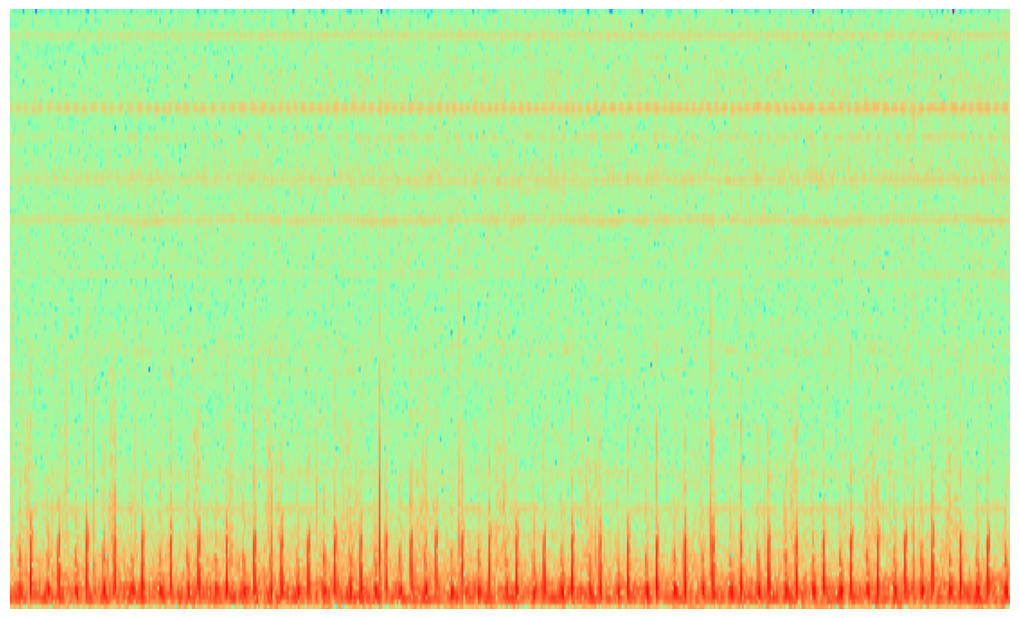

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile

wav_path = "dataset/abnormal/a0001.wav"
sample_rate, data = wavfile.read(wav_path)

if len(data.shape) == 2:
    data = data.mean(axis=1)

fig, ax = plt.subplots(figsize=(10, 6))

ax.specgram(data, Fs=sample_rate, cmap="rainbow")

ax.axis('off')
plt.subplots_adjust(left=0, right=1, top=1, bottom=0)
fig.savefig("clean_spectrogram.png", bbox_inches='tight', pad_inches=0)


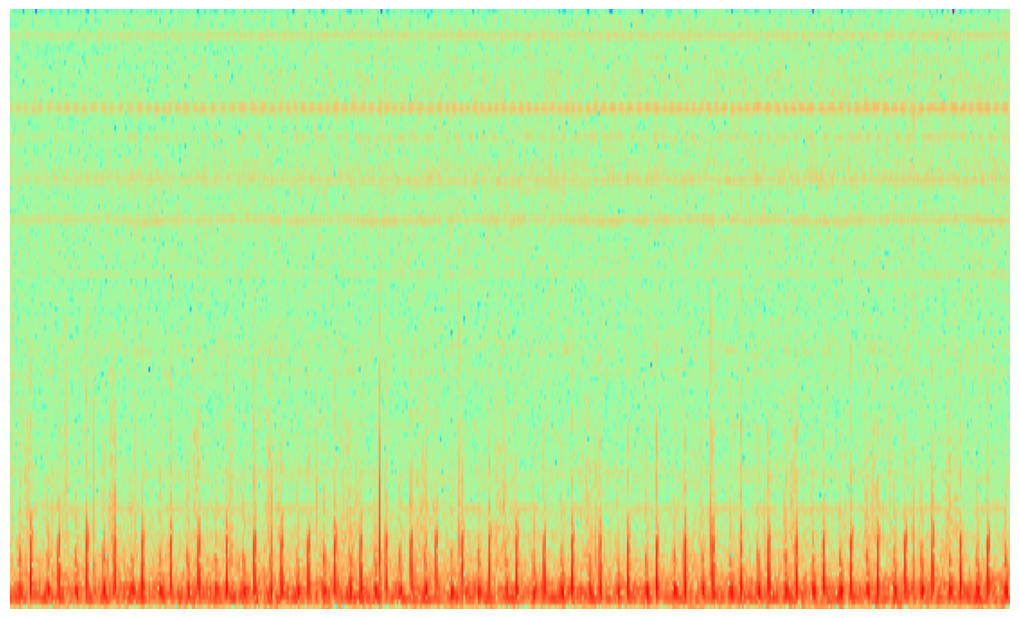

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
wav_path = "dataset/abnormal/a0001.wav"
sample_rate, data = wavfile.read(wav_path)
if len(data.shape) == 2:
    data = data.mean(axis=1)

threshold = 7000 
data = np.clip(data, -threshold, threshold)

fig, ax = plt.subplots(figsize=(10, 6))

ax.specgram(data, Fs=sample_rate, cmap="rainbow")

ax.axis('off')
plt.subplots_adjust(left=0, right=1, top=1, bottom=0)

plt.show()

fig.savefig("clean_spectrogram_new.png", bbox_inches='tight', pad_inches=0)


In order to remove the outliers in the plot we are keeping threshold = 7000 for the maximum value of the amplitude .
Audio (amplitude vs time)  -> spectrogram (signal vs frequency)

1000


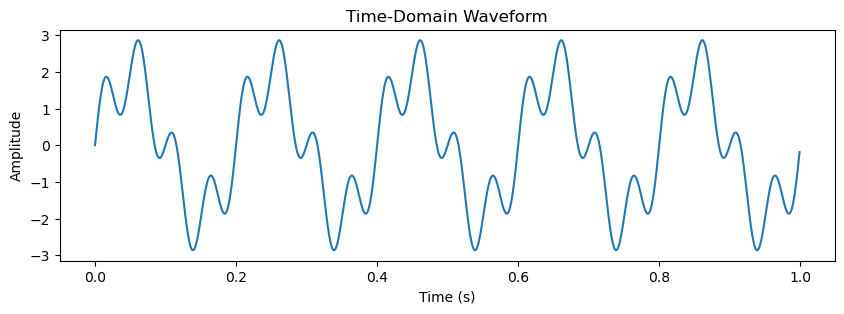

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

fs = 1000 
t = np.arange(0, 1, 1/fs)  
f1 = 5    
f2 = 20   
signal = 2*np.sin(2*np.pi*f1*t) + 1*np.sin(2*np.pi*f2*t)

plt.figure(figsize=(10, 3))
plt.plot(t, signal)
plt.title("Time-Domain Waveform")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.show()


FFT (Fast fourier transform) in simpler terms actually tells us the number of every frequency in the signal (amplitude over time) . The higher the number, the stronger is the wave.

1000
[8.76544217e-14 1.02332357e-13 2.25746111e-13 2.31029328e-13
 3.08281665e-13 1.00000000e+03 2.56851473e-13 1.24128718e-13
 9.50981726e-14 1.87366415e-13 1.07067989e-13 2.89599967e-13
 7.35320841e-13 7.55891794e-13 1.76317305e-13 1.17828847e-13
 1.18946764e-13 8.42850318e-14 2.54641148e-14 2.16251500e-13
 5.00000000e+02 2.96699204e-13 5.87774057e-14 8.29890734e-14
 7.38593509e-14 9.16506319e-14 7.21183920e-14 3.06446598e-13
 5.65780117e-13 2.65752492e-13 1.21269606e-13 1.87461479e-13
 8.36281584e-14 1.78607641e-13 1.72584259e-13 3.19340787e-13
 1.99333192e-13 1.15783852e-13 1.48902840e-13 4.68541214e-14
 8.14492243e-14 1.35371746e-13 5.95441204e-14 1.65969829e-13
 3.37357725e-14 6.76784022e-14 1.05739226e-14 4.78909946e-14
 4.17736079e-14 3.65624155e-14 8.79623556e-14 1.39540494e-13
 8.67024825e-14 9.78656306e-14 1.95565632e-14 3.83403357e-14
 8.15041572e-14 6.14689243e-14 3.10611739e-14 1.50992952e-13
 6.67030624e-14 7.45553387e-14 3.60438718e-14 3.83994843e-14
 8.03045237e-14 6.5

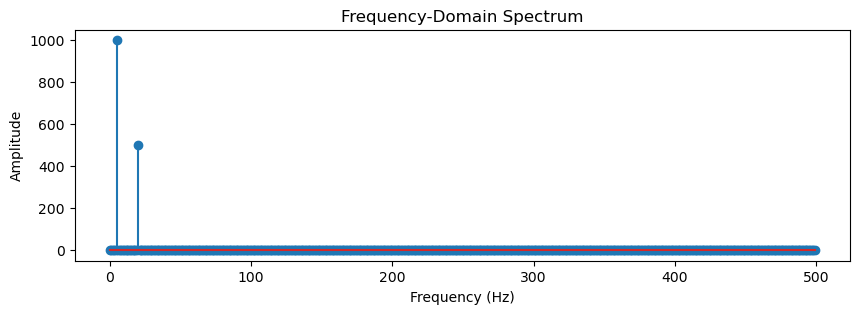

In [ ]:

N = len(signal)
print(N)
fft_result = np.fft.fft(signal)  # convert (amplitude vs time) into (signal vs frequency)

# Frequency bins
freq = np.fft.fftfreq(N, d=1/fs)

# Only take positive frequencies
fft_result = fft_result[:N//2]
freq = freq[:N//2]
magnitude = np.abs(fft_result)
print(magnitude)

# Plot frequency spectrum
plt.figure(figsize=(10, 3))
plt.stem(freq, magnitude)
plt.title("Frequency-Domain Spectrum")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Amplitude")
plt.show()



Below code is converting all the images from the folder called dataset and saving in a folder called spectrograms. The folder spectrograms have two folders called as :
1. Normal 
2. Abnormal

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
import os

input_root = "dataset"  
output_root = "spectrogramprocessedata"
threshold = 7000  
image_size = (200, 200)  

categories = ["abnormal", "normal"]
for cat in categories:
    os.makedirs(os.path.join(output_root, cat), exist_ok=True)
for cat in categories:
    input_folder = os.path.join(input_root, cat)
    output_folder = os.path.join(output_root, cat)
    for filename in os.listdir(input_folder):
        if filename.endswith(".wav"):
            wav_path = os.path.join(input_folder, filename)
            sample_rate, data = wavfile.read(wav_path)
            if len(data.shape) == 2:
                data = data.mean(axis=1)
            data = np.clip(data, -threshold, threshold)
            fig, ax = plt.subplots(figsize=(2, 2), dpi=100)  
            ax.specgram(data, Fs=sample_rate, cmap="rainbow")
            ax.axis('off')
            plt.subplots_adjust(left=0, right=1, top=1, bottom=0)
            # 5. Save spectrogram in the directory "spectrogramprocessedata"
            output_path = os.path.join(output_folder, filename.replace(".wav", ".png"))
            fig.savefig(output_path, bbox_inches='tight', pad_inches=0)
            plt.close(fig) 
print("All spectrograms generated and saved in:", output_root)


c:\Users\HP\anaconda3\Lib\site-packages\matplotlib\axes\_axes.py:8233: RuntimeWarning: divide by zero encountered in log10
  Z = 10. * np.log10(spec)


All spectrograms generated and saved in: spectrogramprocessedata


Loading the Images: In the cell below we are loading images and also resizing all images to 100x100 and converting all images to grayscale to have 1 dimensional data .
Currently we have got the shape to be 3230,4000 where 3230 are the number of images and 4000 are the number of features of each image.
\
All images are converted from coloured (channel = 3) to grayscale (channel = 1)


Plotting the data which below shows the class imabalance in the dataset originally

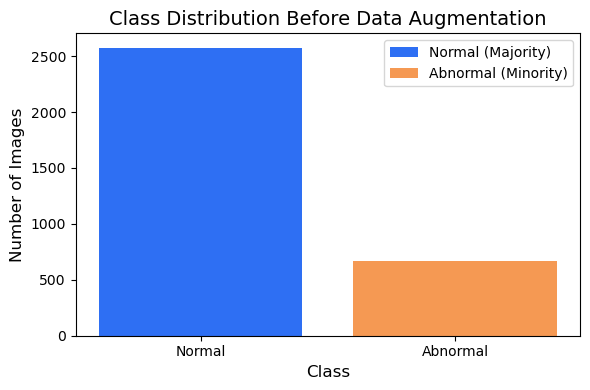

In [4]:
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

classes = ['Normal', 'Abnormal']
counts = [2575, 665]
colors = ["#2E6FF3", "#F48836DA"] 
plt.figure(figsize=(6,4))
bars = plt.bar(classes, counts, color=colors)
plt.title("Class Distribution Before Data Augmentation", fontsize=14)
plt.xlabel("Class", fontsize=12)
plt.ylabel("Number of Images", fontsize=12)

legend_elements = [
    Patch(facecolor=colors[0], label="Normal (Majority)"),
    Patch(facecolor=colors[1], label="Abnormal (Minority)")
]
plt.legend(handles=legend_elements, loc='upper right')

plt.tight_layout()
plt.show()


The dataset had a huge imabalnce. In order to reduce the class imabalance certain measures were taken where data augmentation was done on the minor classes "Abnormal" where 3 types of techniques were applied 
1. horizontal flip
2. vertical flip
3. Color contrast techniques
4. RandomResizedcrop
below is the code


In [ ]:
import os
from PIL import Image
from torchvision import transforms

# Define augmentation pipeline (no rotation)
augment = transforms.Compose([
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.RandomVerticalFlip(p=0.5),  # added vertical flip
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.05),
    transforms.RandomResizedCrop(size=(224, 224), scale=(0.9, 1.0)) 
])

input_dir = 'spectrogramprocessedata/abnormal'      
output_dir = 'spectrogramprocessedata/aug1_abnormal'  
os.makedirs(output_dir, exist_ok=True)

num_augmentations = 3  

for filename in os.listdir(input_dir):
    if filename.endswith(('.png', '.jpg', '.jpeg')):
        img_path = os.path.join(input_dir, filename)
        img = Image.open(img_path).convert('RGB')
        
        # Save the original image to the augmented folder as well
        base_name, ext = os.path.splitext(filename)
        img.save(os.path.join(output_dir, f"{base_name}_orig{ext}"))
        
        # Generate augmented copies
        for i in range(num_augmentations):
            aug_img = augment(img)
            aug_img.save(os.path.join(output_dir, f"{base_name}_aug{i}{ext}"))


Plotting the data to show number of samples in the dataset which is augmented

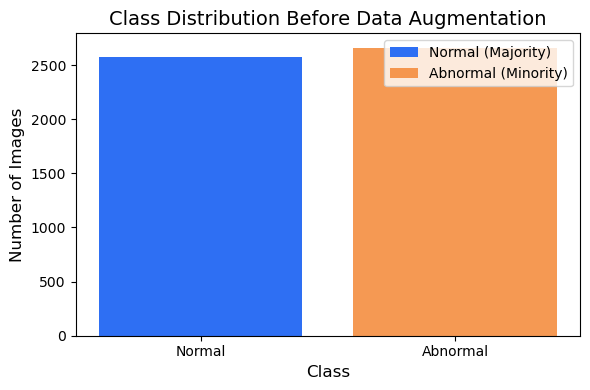

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

classes = ['Normal', 'Abnormal']
counts = [2575, 2660]
colors = ["#2E6FF3", "#F48836DA"] 
plt.figure(figsize=(6,4))
bars = plt.bar(classes, counts, color=colors)
plt.title("Class Distribution After Data Augmentation", fontsize=14)
plt.xlabel("Class", fontsize=12)
plt.ylabel("Number of Images", fontsize=12)

legend_elements = [
    Patch(facecolor=colors[0], label="Normal (Majority)"),
    Patch(facecolor=colors[1], label="Abnormal (Minority)")
]
plt.legend(handles=legend_elements, loc='upper right')

plt.tight_layout()
plt.show()
